<a href="https://colab.research.google.com/github/Afigodoga/AfiRep/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Loan_default.csv")

In [3]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [5]:
df.shape

(255347, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [8]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   LoanID          255347 non-null  category
 1   Age             255347 non-null  int64   
 2   Income          255347 non-null  int64   
 3   LoanAmount      255347 non-null  int64   
 4   CreditScore     255347 non-null  int64   
 5   MonthsEmployed  255347 non-null  int64   
 6   NumCreditLines  255347 non-null  int64   
 7   InterestRate    255347 non-null  float64 
 8   LoanTerm        255347 non-null  int64   
 9   DTIRatio        255347 non-null  float64 
 10  Education       255347 non-null  category
 11  EmploymentType  255347 non-null  category
 12  MaritalStatus   255347 non-null  category
 13  HasMortgage     255347 non-null  category
 14  HasDependents   255347 non-null  category
 15  LoanPurpose     255347 non-null  category
 16  HasCoSigner     255347 non-null  categ

In [9]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [10]:
df.describe(include=['category']).T

,count,unique,top,freq
LoanID,255347,255347,0003HW9UAA,1
Education,255347,4,Bachelor's,64366
EmploymentType,255347,4,Part-time,64161
MaritalStatus,255347,3,Married,85302
HasMortgage,255347,2,Yes,127677
HasDependents,255347,2,Yes,127742
LoanPurpose,255347,5,Business,51298
HasCoSigner,255347,2,Yes,127701


In [11]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
cols_cat= df.select_dtypes(['category'])

In [14]:
df['LoanTerm']=df['LoanTerm']/12

In [15]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in LoanID are :
LoanID
0003HW9UAA    1
O16Y9AYUZ9    1
O13IX6QF0B    1
O13Q69VJQU    1
O13RJ9I0LN    1
             ..
C0K5NIGGKZ    1
C0K888SPGB    1
C0KN60Z9UV    1
C0KO1RFMJP    1
ZZZX015LV2    1
Name: count, Length: 255347, dtype: int64
**************************************************
Unique values in Education are :
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
**************************************************
Unique values in EmploymentType are :
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
**************************************************
Unique values in MaritalStatus are :
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
**************************************************
Unique values in HasMortgage are :
HasMortgage
Yes    127677
No     127670
Name: count

In [16]:
cat_col=[
    "Education",
    "EmploymentType",
    "MaritalStatus",
    "HasMortgage",
    "HasDependents",
    "LoanPurpose",
]
    # Printing number of count of each unique value in each column
for  column in cat_col:
  print(df[column].value_counts())
  print("" * 40)

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64



In [17]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

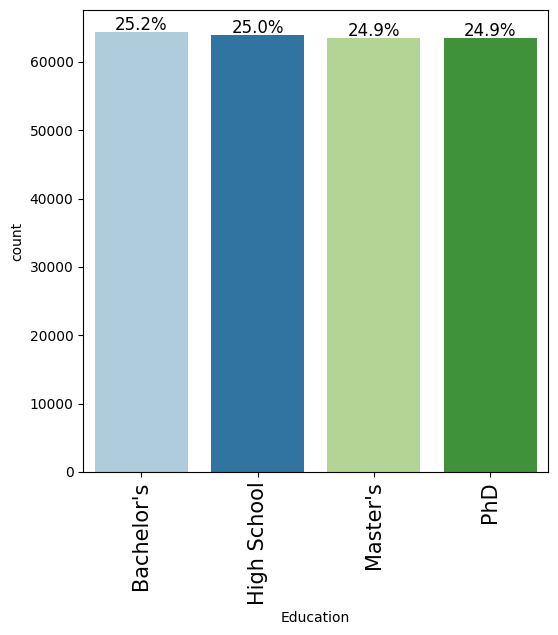

In [18]:
labeled_barplot(df,"Education",perc=True)

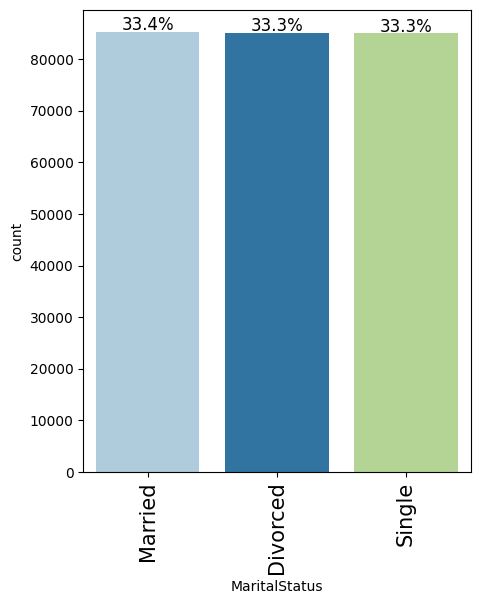

In [19]:
labeled_barplot(df,"MaritalStatus",perc=True)

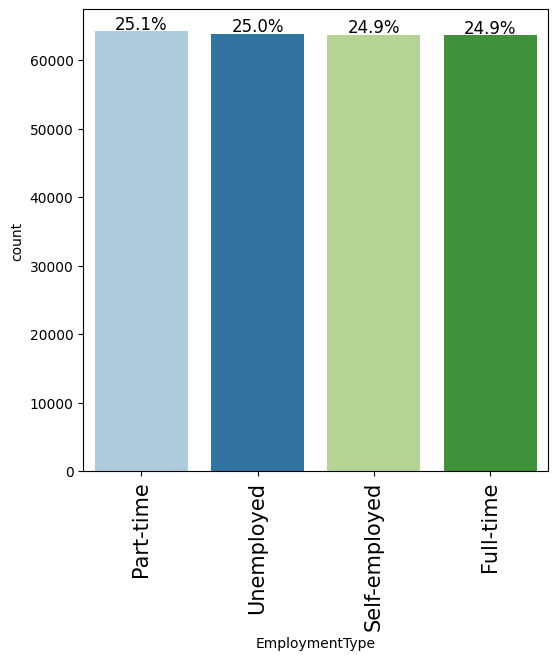

In [20]:
labeled_barplot(df,"EmploymentType",perc=True)

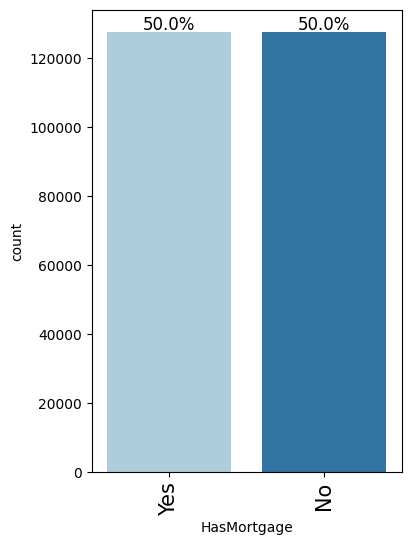

In [21]:
labeled_barplot(df,"HasMortgage",perc=True)

In [22]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [23]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Default              0      1     All
EmploymentType                       
All             225694  29653  255347
Unemployed       55174   8650   63824
Part-time        56484   7677   64161
Self-employed    56404   7302   63706
Full-time        57632   6024   63656
------------------------------------------------------------------------------------------------------------------------


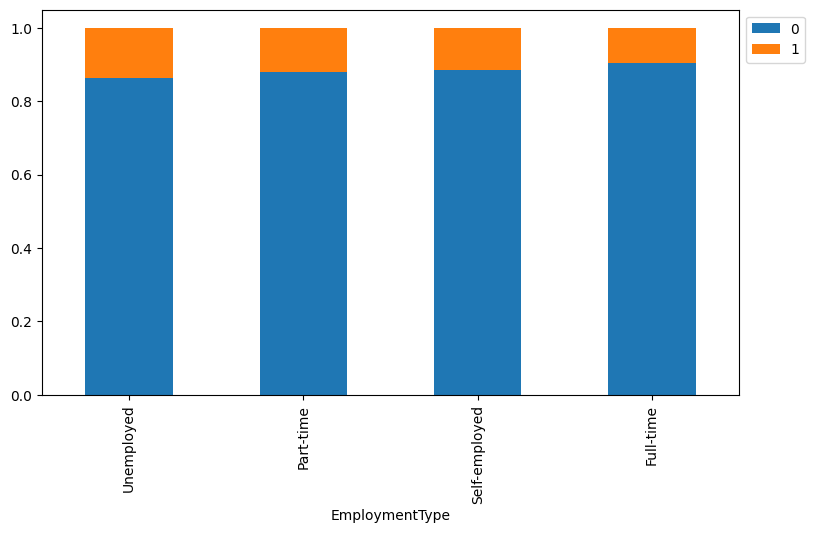

In [24]:
stacked_barplot(df,"EmploymentType","Default")

Default             0      1     All
HasDependents                       
All            225694  29653  255347
No             111368  16237  127605
Yes            114326  13416  127742
------------------------------------------------------------------------------------------------------------------------


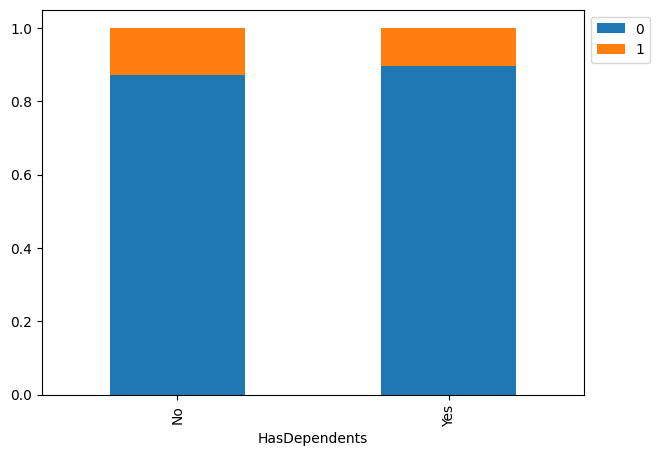

In [25]:
stacked_barplot(df,"HasDependents","Default")

Default           0      1     All
Education                         
All          225694  29653  255347
High School   55673   8230   63903
Bachelor's    56577   7789   64366
Master's      56633   6908   63541
PhD           56811   6726   63537
------------------------------------------------------------------------------------------------------------------------


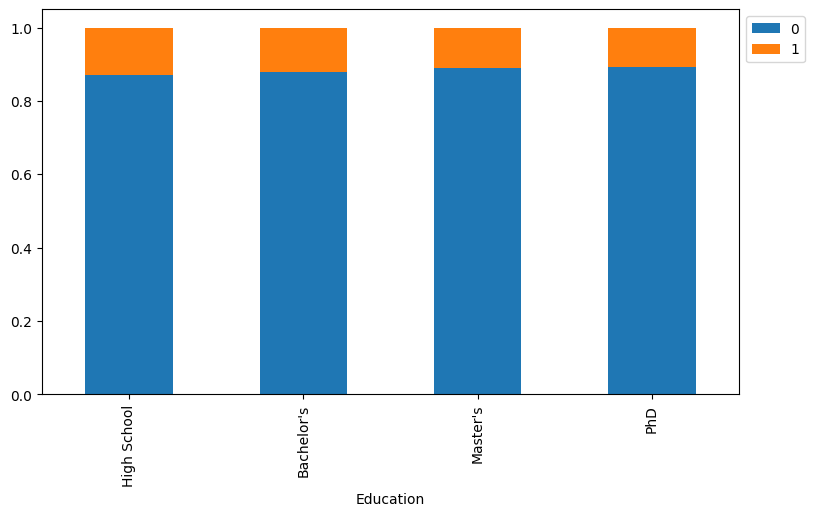

In [26]:
stacked_barplot(df,"Education","Default")

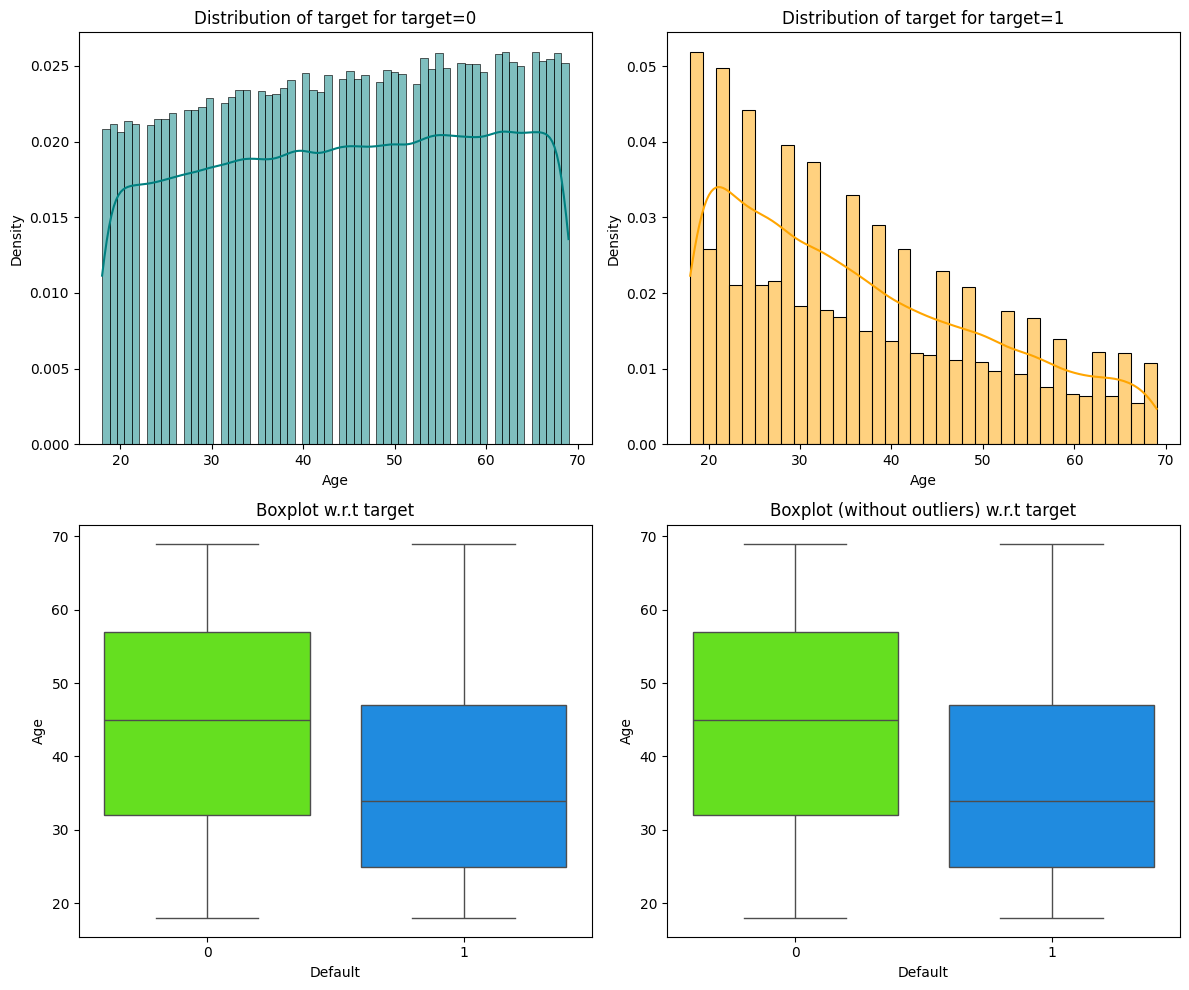

In [27]:
distribution_plot_wrt_target(df,"Age","Default")

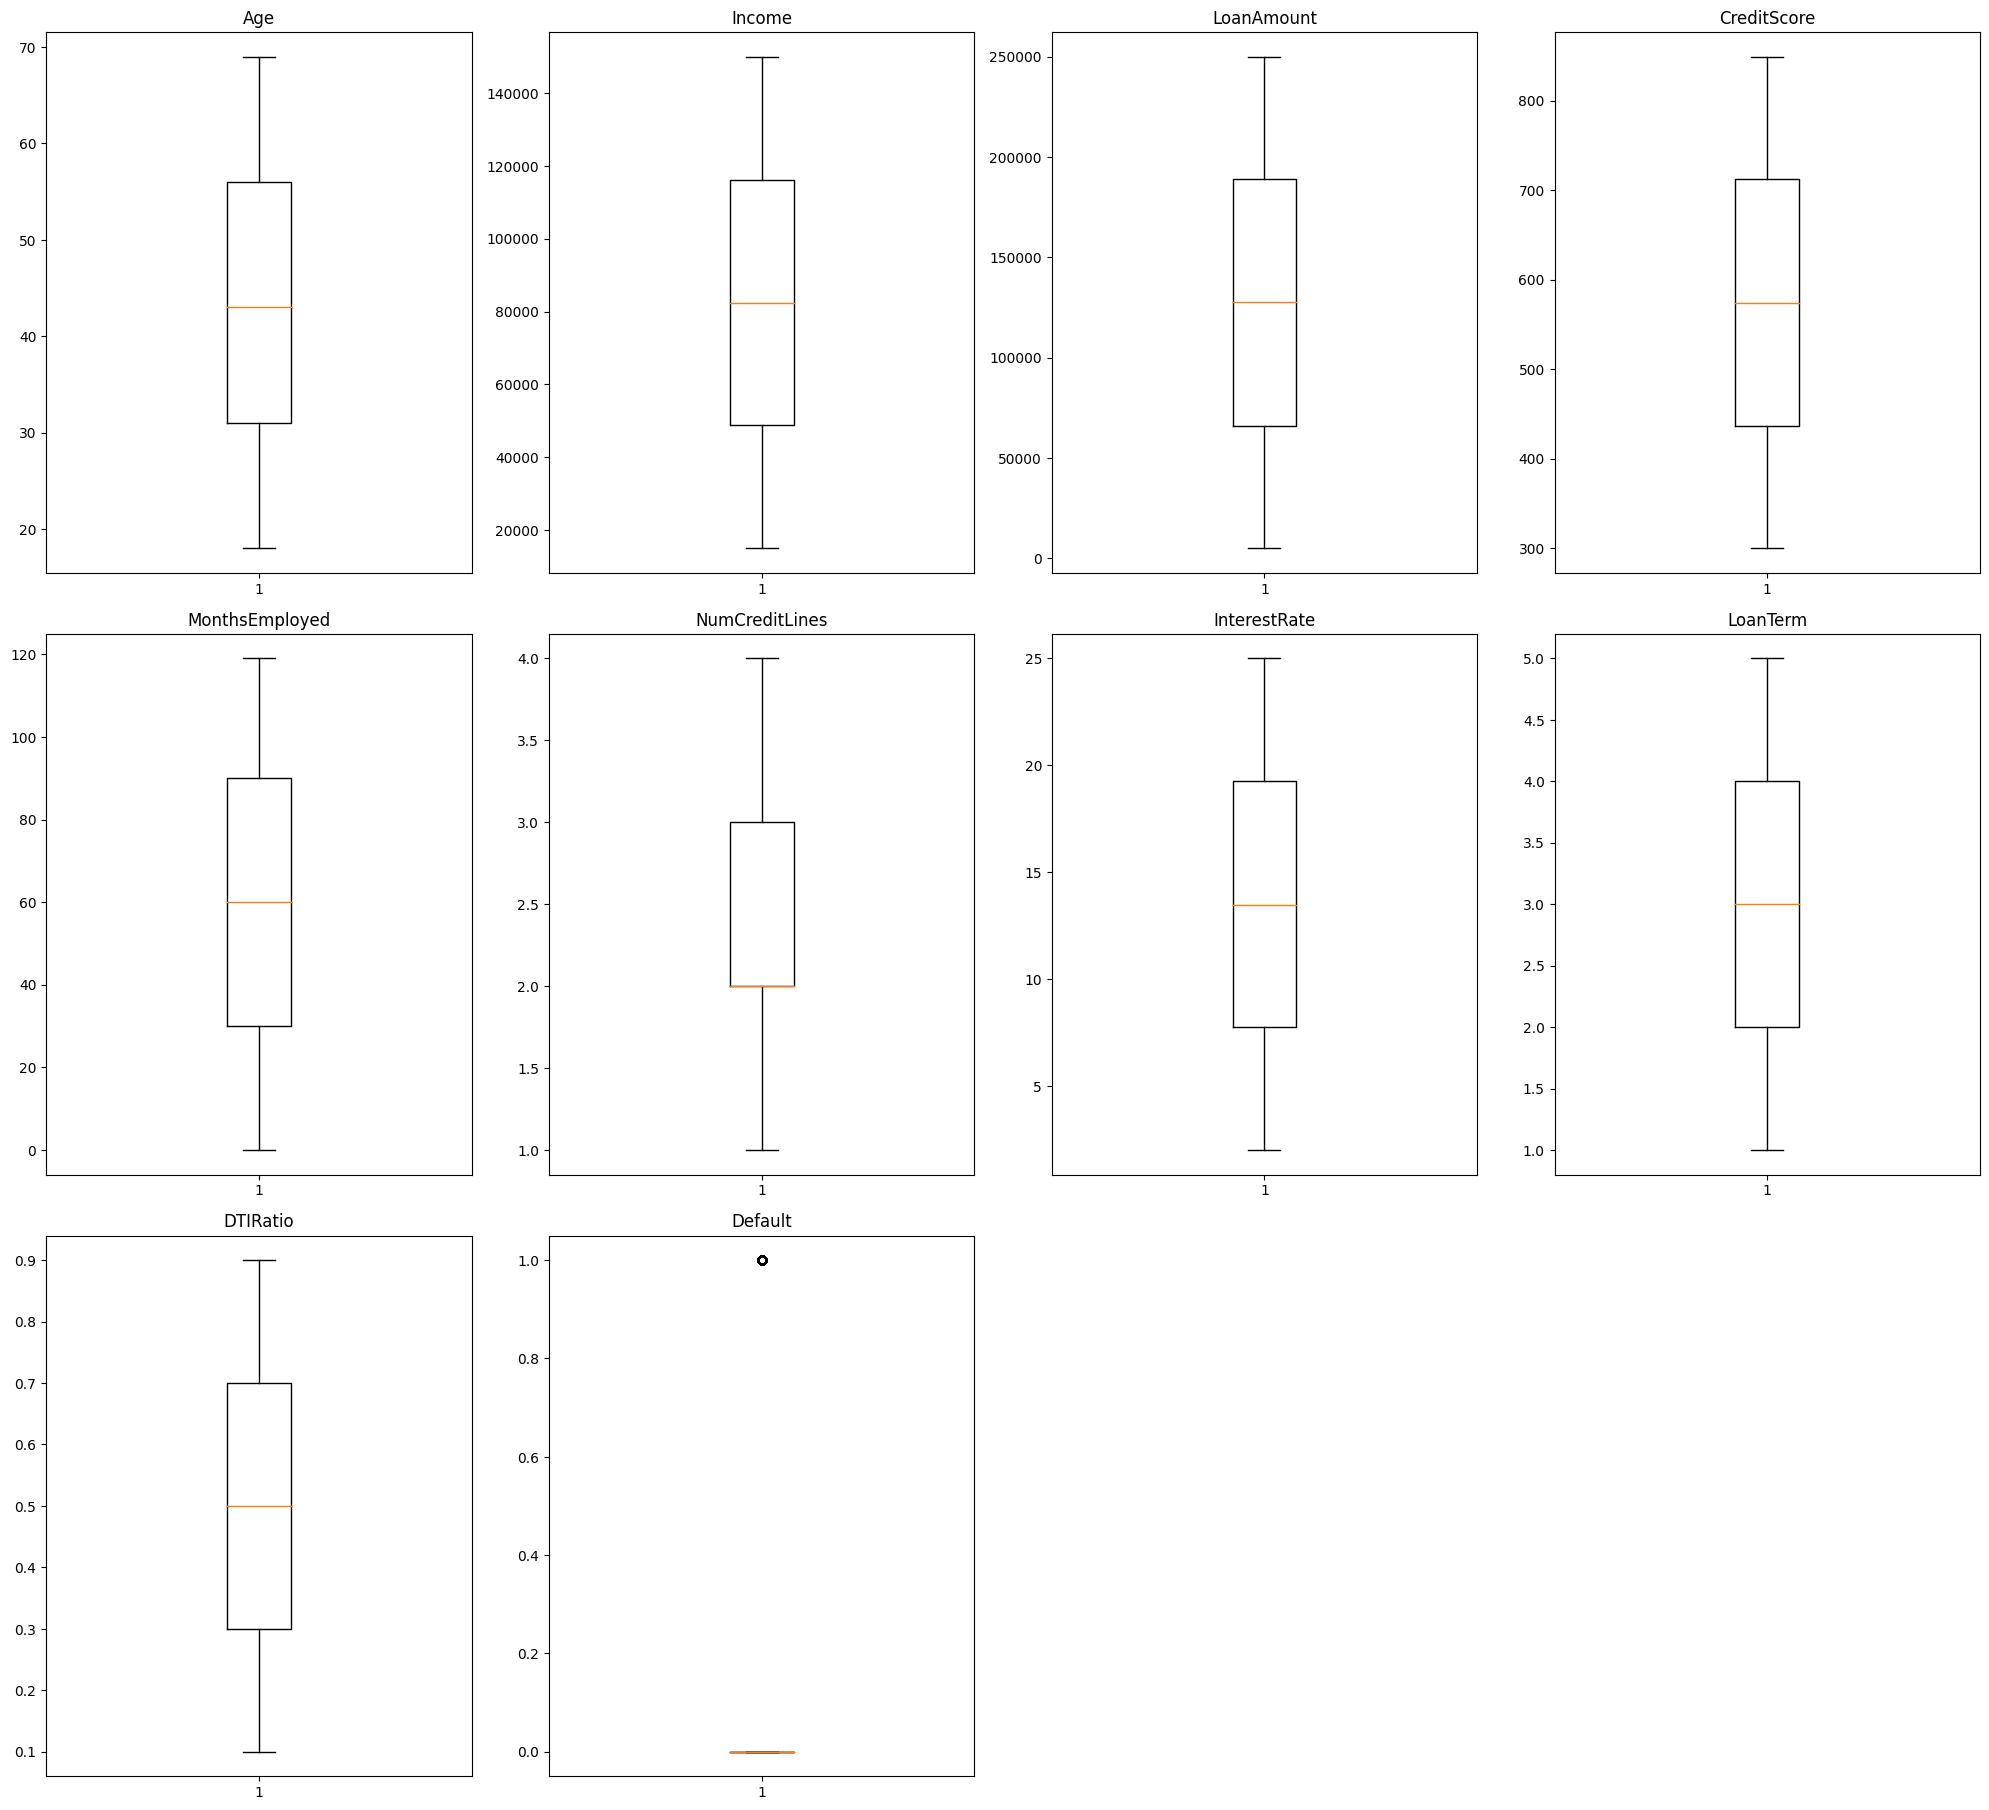

In [28]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
obj_col = ['HasCoSigner','LoanPurpose','HasDependents', 'HasMortgage','MaritalStatus', 'EmploymentType', 'Education']
for col in obj_col:
    df[col] = le.fit_transform(df[col])

df= df.drop(['LoanID'], axis=1)

In [31]:
df.dtypes

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm          float64
DTIRatio          float64
Education           int64
EmploymentType      int64
MaritalStatus       int64
HasMortgage         int64
HasDependents       int64
LoanPurpose         int64
HasCoSigner         int64
Default             int64
dtype: object

In [32]:
corr = df.corrwith(df['Default'])
print(corr.sort_values(ascending=False))

Default           1.000000
InterestRate      0.131273
LoanAmount        0.086659
EmploymentType    0.041010
NumCreditLines    0.028330
DTIRatio          0.019236
LoanTerm          0.000545
MaritalStatus    -0.007902
LoanPurpose      -0.010096
Education        -0.022835
HasMortgage      -0.022856
CreditScore      -0.034166
HasDependents    -0.034678
HasCoSigner      -0.039109
MonthsEmployed   -0.097374
Income           -0.099119
Age              -0.167783
dtype: float64


In [34]:
X = df.drop(['Default'], axis=1)
y = df['Default']

In [37]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [38]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(178742, 16) (76605, 16)


In [39]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [41]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

CHECKING PERFORMANCE

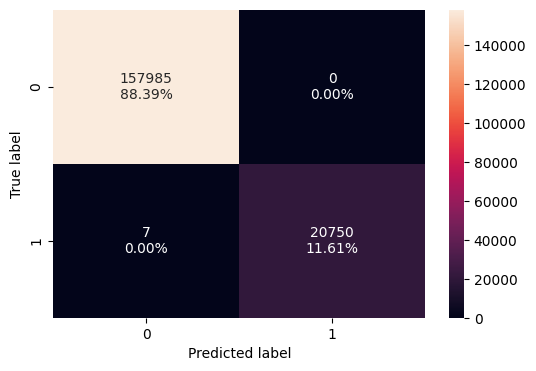

In [42]:
confusion_matrix_sklearn(rf,X_train,y_train)


In [40]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999961  0.999663        1.0  0.999831


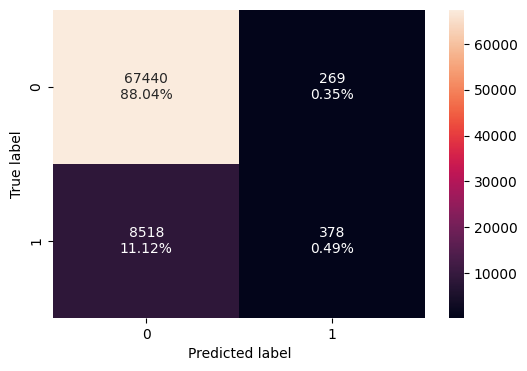

In [43]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [44]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.885295  0.042491   0.584235  0.07922


In [45]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

Random forest with class weights

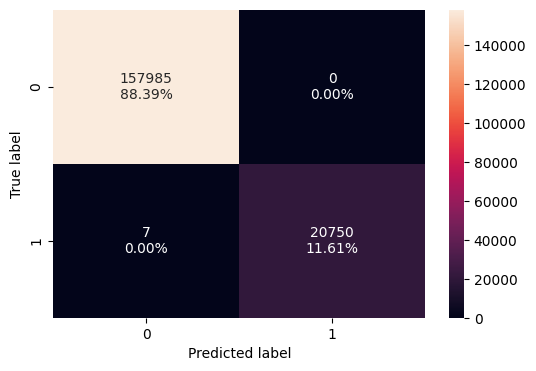

In [46]:
confusion_matrix_sklearn(rf_wt, X_train,y_train)

In [47]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999961  0.999663        1.0  0.999831


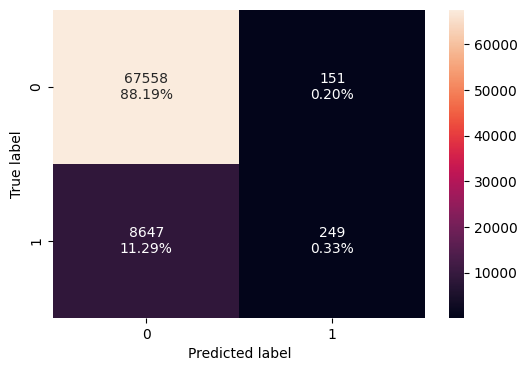

In [48]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [49]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.885151  0.02799     0.6225  0.053571


There not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

Tuning Random Forest

In [ ]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)